In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
data= pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# Data visualization

<AxesSubplot:xlabel='Quarter'>

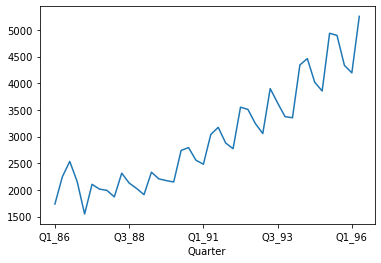

In [3]:
data_vis=pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
data_vis.plot()

<AxesSubplot:ylabel='Density'>

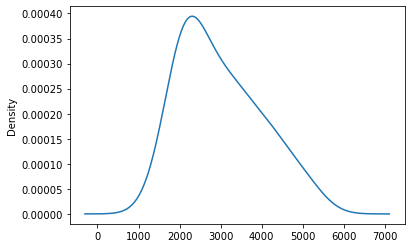

In [4]:
data_vis.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

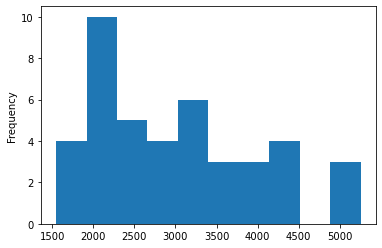

In [5]:
data_vis.plot(kind='hist')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

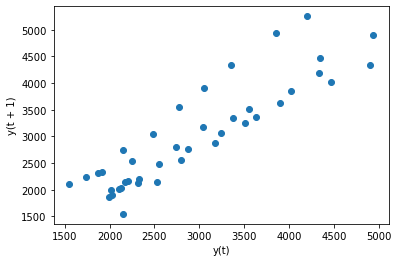

In [6]:
lag_plot(data_vis)

# Model building

In [7]:
a= data['Quarter'][0]
a

'Q1_86'

In [8]:
data['quarters']=0
data['year']=0

for i in range(42):
    p= data['Quarter'][i]
    data['quarters'][i]= p[0:2]
    data['year'][i]= p[3:]
data.head()

,Quarter,Sales,quarters,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [9]:
dummies= pd.get_dummies(data.quarters)


In [10]:
data= pd.concat([data, dummies], axis=1)
data.head()

,Quarter,Sales,quarters,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [11]:
data['t']= np.arange(1,43)
data['t_sq']= data.t**2
data['log_sales']= np.log(data.Sales)
data.head()

,Quarter,Sales,quarters,year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [12]:
pivot_month_year= pd.pivot_table(data, values='Sales',
                                       index='year',
                                        columns='quarters',
                                        aggfunc= 'mean', 
                                         fill_value=0)
pivot_month_year

quarters,Q1,Q2,Q3,Q4
year,,,,
86,1734.827000,2244.960999,2533.804993,2154.962997
87,1547.818996,2104.411995,2014.362999,1991.746998
88,1869.049999,2313.631996,2128.320000,2026.828999
89,1910.603996,2331.164993,2206.549995,2173.967995
90,2148.278000,2739.307999,2792.753998,2556.009995
91,2480.973999,3039.522995,3172.115997,2879.000999
92,2772.000000,3550.000000,3508.000000,3243.859993
93,3056.000000,3899.000000,3629.000000,3373.000000
94,3352.000000,4342.000000,4461.000000,4017.000000


<AxesSubplot:xlabel='year', ylabel='Sales'>

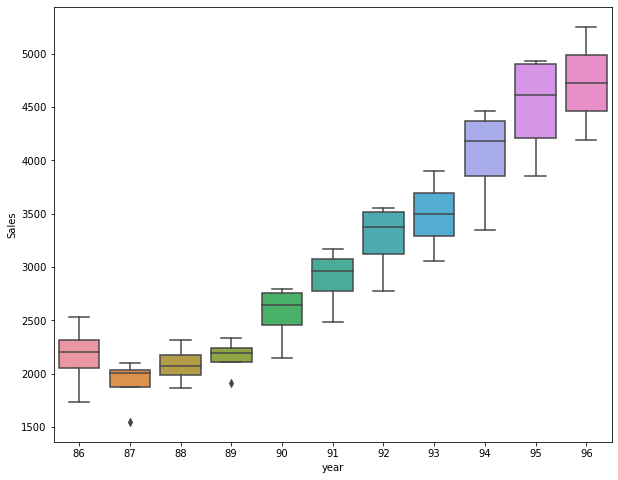

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x='year', y='Sales', data=data)

<AxesSubplot:xlabel='quarters', ylabel='Sales'>

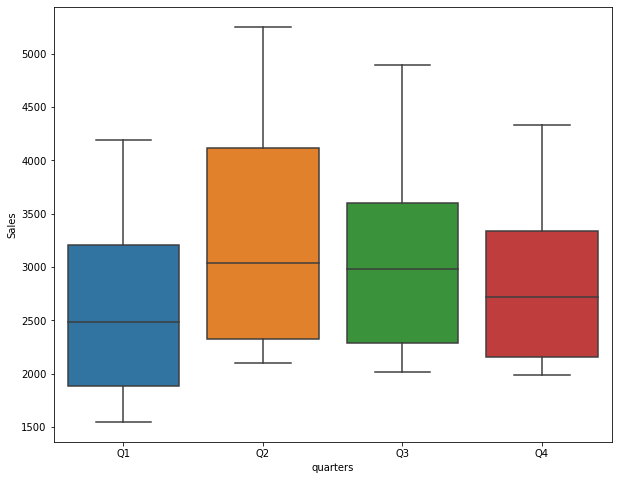

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='quarters', y='Sales', data=data)

# Model building

In [15]:
train= data.head(35)
test= data.tail(7)

In [16]:
lin_model= smf.ols('Sales~t', data=train).fit()
lin_pred= pd.Series(lin_model.predict(test.t))
lin_pred

35    3840.422277
36    3904.126945
37    3967.831612
38    4031.536280
39    4095.240948
40    4158.945616
41    4222.650284
dtype: float64

In [17]:
lin_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.775     
Dependent Variable: Sales            AIC:                511.4679  
Date:               2022-10-13 01:08 BIC:                514.5786  
No. Observations:   35               Log-Likelihood:     -253.73   
Df Model:           1                F-statistic:        117.8     
Df Residuals:       33               Prob (F-statistic): 2.01e-12  
R-squared:          0.781            Scale:              1.2301e+05
-------------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept     1547.0542 121.1565 12.7691 0.0000 1300.5596 1793.5489
t               63.7047   5.8700 10.8525 0.0000   51.7620   75.6474
-------------------------------------------------------------------
Omnibus:                2.895        Durbin-Watson:           1.189
Prob(Omnibus):          0.235        Jarque-Bera (JB):        2.654
Skew:                   0.629        Prob(JB):                0.265
Kurtosis:               2.513        Condition No.:           42   
===================================================================

"""

In [18]:
lin_rmse= np.sqrt(np.mean((np.array(test.Sales)- np.array(lin_pred))**2))
lin_rmse

636.5072930351148

# implementing th exponantial model

In [19]:
exp_model=smf.ols('log_sales~ t', data=train).fit()
exp_pred= pd.Series(exp_model.predict(test['t']))
exp_pred

35    8.280213
36    8.303351
37    8.326489
38    8.349626
39    8.372764
40    8.395901
41    8.419039
dtype: float64

In [20]:
exp_rmse= np.sqrt(np.mean((np.array(test.Sales)- np.array(np.exp(exp_pred)))**2))
exp_rmse

493.348648484222

In [21]:
exp_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.787   
Dependent Variable: log_sales        AIC:                -45.4150
Date:               2022-10-13 01:08 BIC:                -42.3043
No. Observations:   35               Log-Likelihood:     24.708  
Df Model:           1                F-statistic:        126.3   
Df Residuals:       33               Prob (F-statistic): 8.05e-13
R-squared:          0.793            Scale:              0.015133
-------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept   7.4473     0.0425   175.2536   0.0000   7.3608   7.5337
t           0.0231     0.0021    11.2381   0.0000   0.0189   0.0273
-----------------------------------------------------------------
Omnibus:              1.454        Durbin-Watson:           1.449
Prob(Omnibus):        0.483        Jarque-Bera (JB):        1.078
Skew:                 0.427        Prob(JB):                0.583
Kurtosis:             2.899        Condition No.:           42   
=================================================================

"""

# developing the additive seasonality model

In [22]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
pred_add_sea

35    2549.922247
36    2319.061332
37    2951.555664
38    2938.434220
39    2549.922247
40    2319.061332
41    2951.555664
dtype: float64

In [23]:
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251756

# developing the multiplicative seasonality

In [24]:
mul_sea_model = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
pred_mult_sea

35    7.823789
36    7.716661
37    7.958124
38    7.951932
39    7.823789
40    7.716661
41    7.958124
dtype: float64

In [25]:
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1938.9332351966248

# developing the model of multiplicative additive seasonality

In [26]:
mul_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
pred_mult_add_sea

35    8.231646
36    8.169836
37    8.411299
38    8.405107
39    8.322281
40    8.260471
41    8.501934
dtype: float64

In [27]:
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 

339.18746669947365

# Implementing quadratic model

In [28]:
quad_model=smf.ols('Sales~t+t_sq', data=train).fit()
quad_pred= quad_model.predict(test[['t', 't_sq']])
quad_pred

35    4337.773235
36    4484.369729
37    4635.446862
38    4791.004635
39    4951.043047
40    5115.562098
41    5284.561789
dtype: float64

In [29]:
quad_rmse= np.sqrt(np.mean((np.array(test.Sales)- np.array(quad_pred))**2))
quad_rmse

511.8117319417597

In [30]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     98.10
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.24e-14
Time:                        01:08:30   Log-Likelihood:                -245.94
No. Observations:                  35   AIC:                             497.9
Df Residuals:                      32   BIC:                             502.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2044.4052    153.242     13.341      0.000    1732.261    2356.550
t            -16.9468     19.628     -0.863      0.394     -56.927      23.034
t_sq           2.2403      0.529      4.236      0.000       1.163       3.318
==============================================================================
Omnibus:                        1.881   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.181
Skew:                          -0.110   Prob(JB):                        0.554
Kurtosis:                       2.128   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# developing the additive seasonality quardratic model

In [31]:
add_sea_Quad_model = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_sq','Q1','Q2','Q3','Q4']]))
pred_add_sea_quad

35    4197.333511
36    4120.453583
37    4840.142044
38    4914.214728
39    4795.942579
40    4736.501477
41    5473.628762
dtype: float64

In [32]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.46413951632354

In [33]:
data1 = {"MODEL":pd.Series(["lin_rmse","exp_rmse","quad_rmse","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([lin_rmse,exp_rmse,quad_rmse,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,exp_rmse,493.348648
2,quad_rmse,511.811732
0,lin_rmse,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235
